In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline


C:\Users\nikita059240\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [197]:
training=pd.read_csv('D:/training.csv',index_col=0)
testing=pd.read_csv('D:/testing.csv',index_col=0)
training.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
ID,,,,,,,,,
1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [3]:
testing.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
ID,,,,,,,,
1,30000.0,1,1,2,40,24430.0,23881.0,24234.0
2,20000.0,1,1,2,41,16474.0,17203.0,18411.0
3,20000.0,1,1,2,36,18600.0,17947.0,18758.0
4,20000.0,1,1,2,35,2948.0,3372.0,0.0
5,170000.0,1,1,2,38,145196.0,110163.0,112157.0


In [4]:
print(training.shape)
print(testing.shape)

(16625, 9)
(16625, 8)


In [5]:
training.describe()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,1.476932,2.117534,1.588752,43.373955,50720.634827,48815.920662,46471.030556,0.399158
std,124931.062684,0.523590,0.791191,0.492075,8.777974,73365.449060,70753.129768,68182.984755,0.489740
min,0.000000,1.000000,1.000000,1.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000
25%,50000.000000,1.000000,2.000000,1.000000,37.000000,3491.000000,2997.000000,2550.000000,0.000000
50%,120000.000000,1.000000,2.000000,2.000000,42.000000,21943.000000,20987.000000,19954.000000,0.000000
75%,230000.000000,2.000000,3.000000,2.000000,49.000000,65903.000000,62725.000000,59111.000000,1.000000
max,800000.000000,3.000000,4.000000,2.000000,72.000000,746814.000000,646770.000000,693131.000000,1.000000


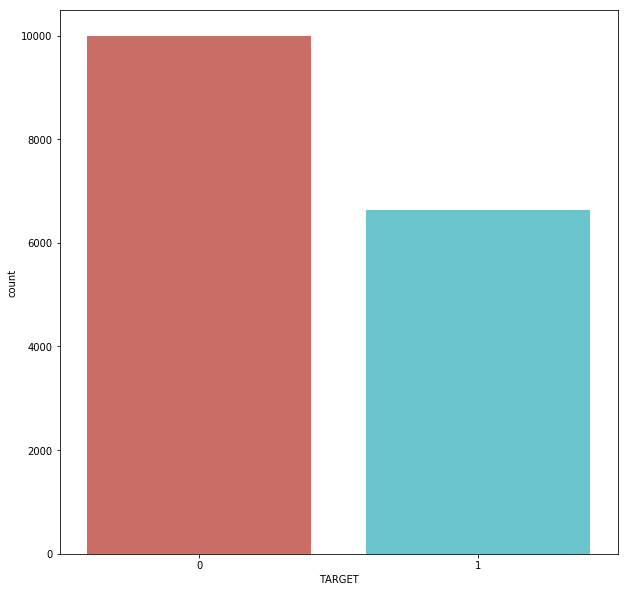

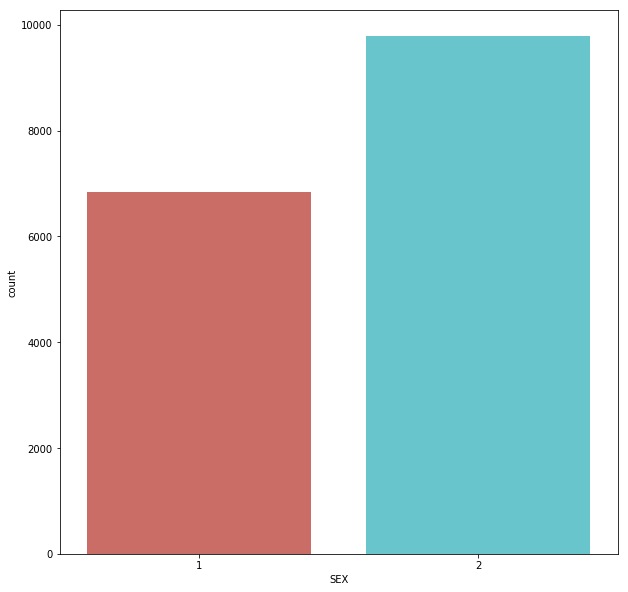

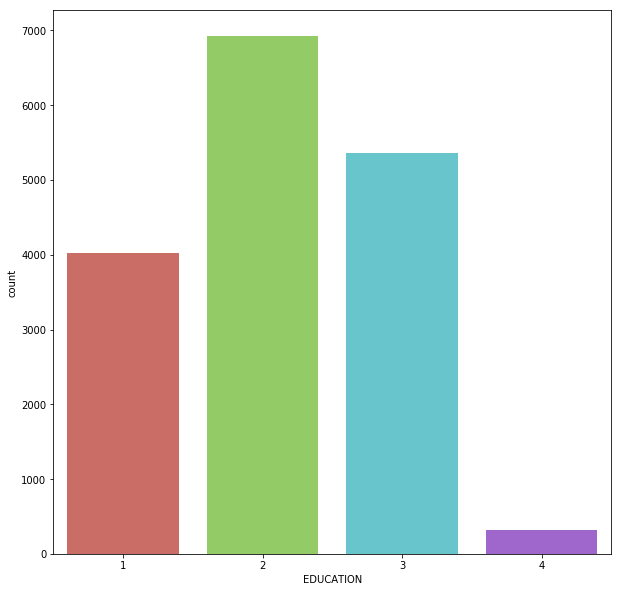

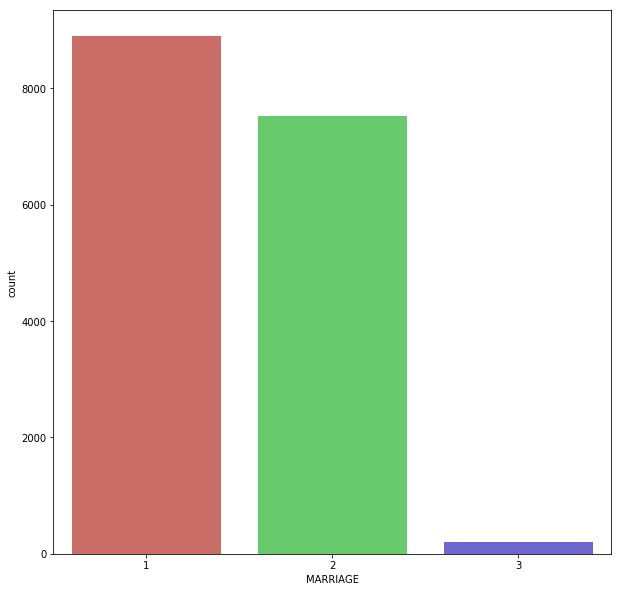

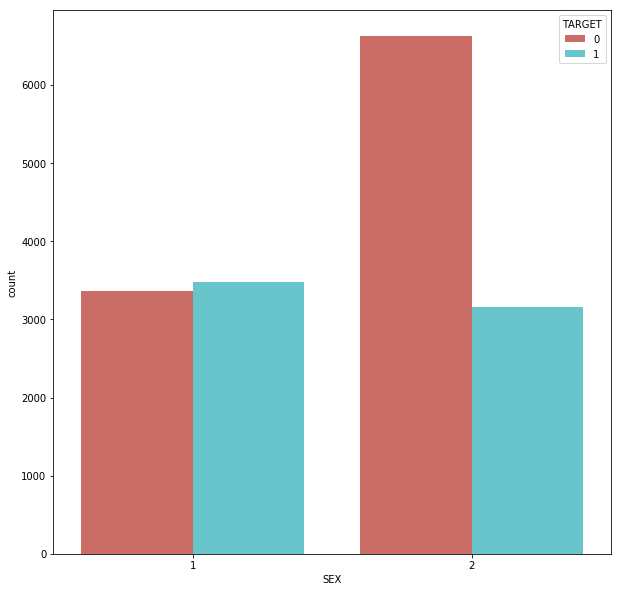

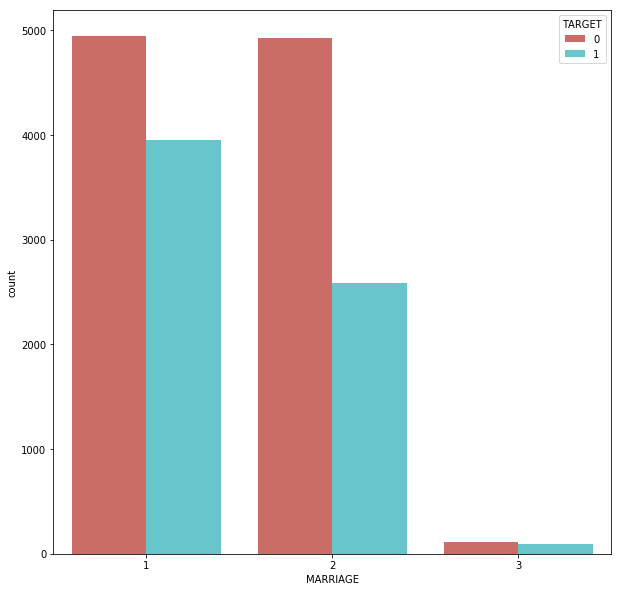

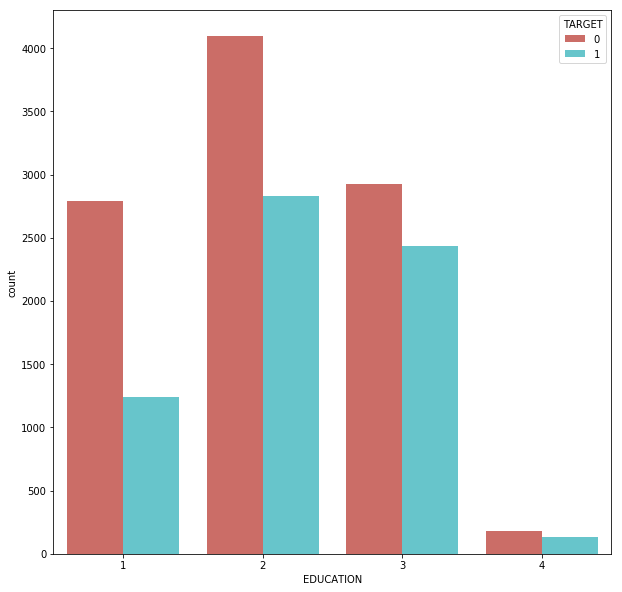

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(x='TARGET',data=training,palette='hls')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='SEX',data=training,palette='hls')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='EDUCATION',data=training,palette='hls')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='MARRIAGE',data=training,palette='hls')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='SEX',data=training,palette='hls',hue='TARGET')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='MARRIAGE',data=training,palette='hls',hue='TARGET')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x='EDUCATION',data=training,palette='hls',hue='TARGET')
plt.show()

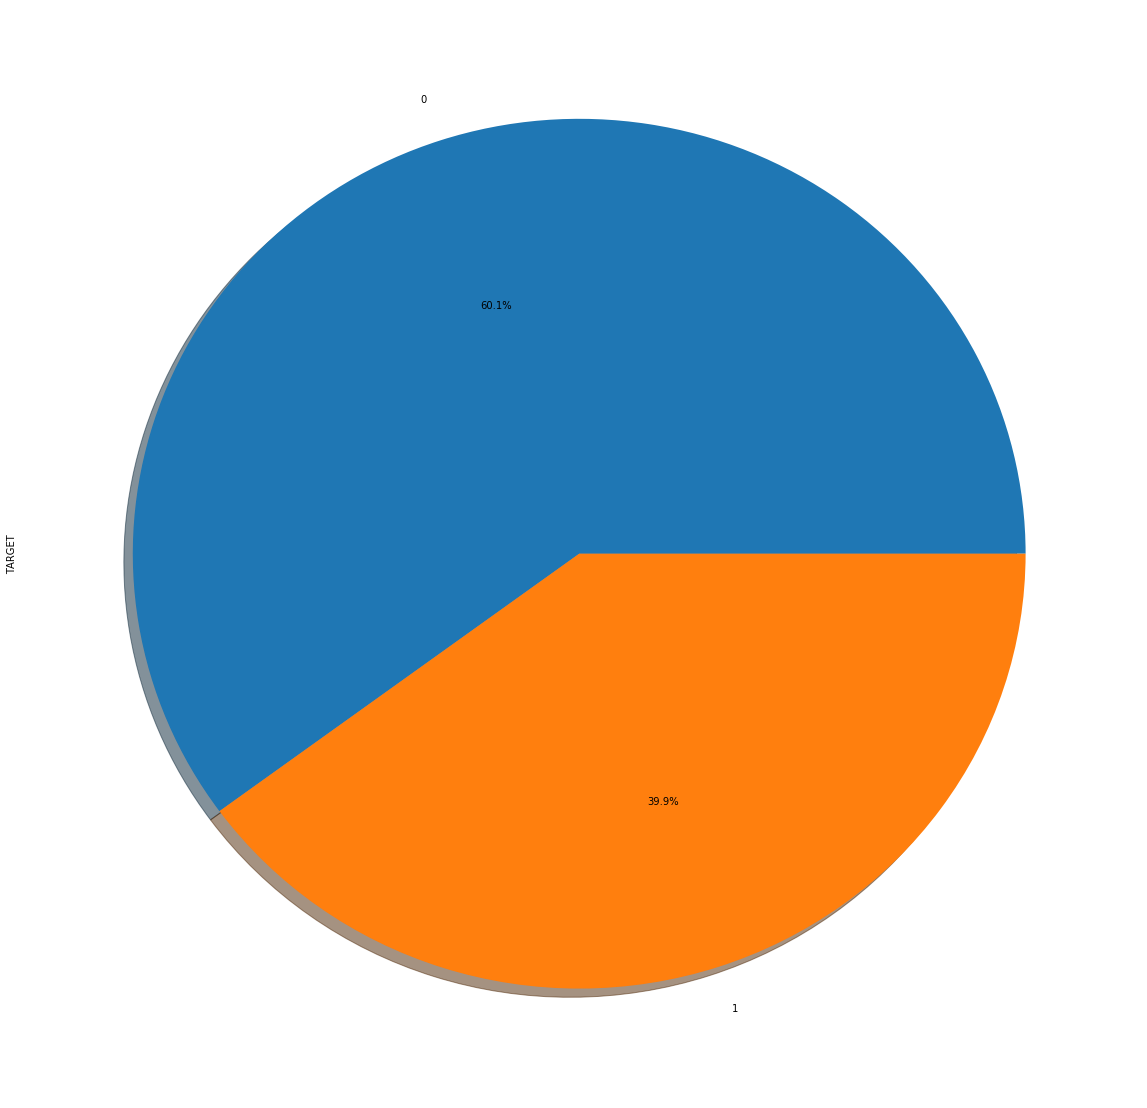

In [7]:
plt.figure(figsize=(20,20))
training['TARGET'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

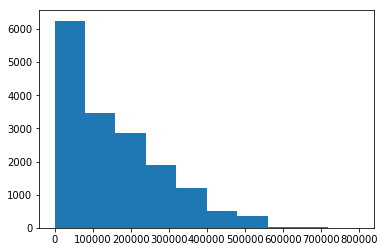

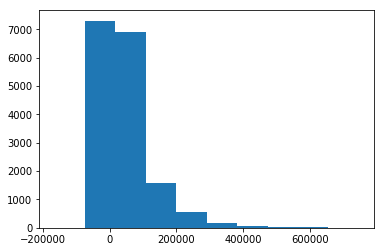

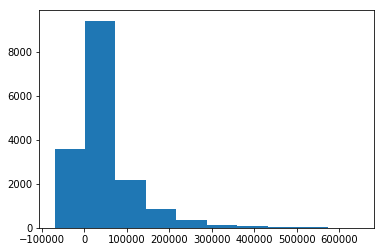

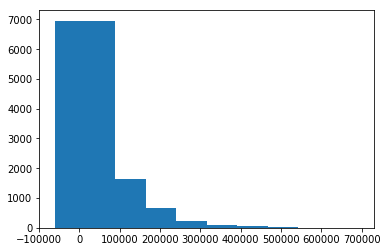

In [8]:
x =training['LIMIT_BAL']
plt.hist(x)
plt.show()

x =training['BILL_AMT1']
plt.hist(x)
plt.show()

x =training['BILL_AMT2']
plt.hist(x)
plt.show()

x =training['BILL_AMT3']
plt.hist(x)
plt.show()

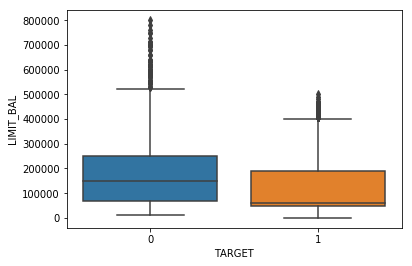

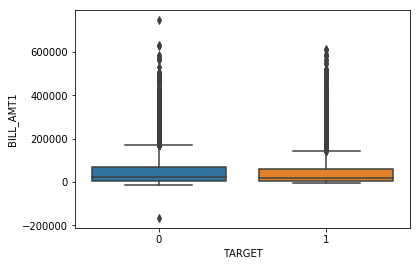

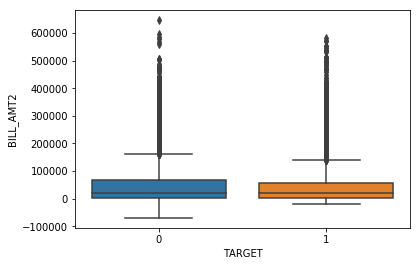

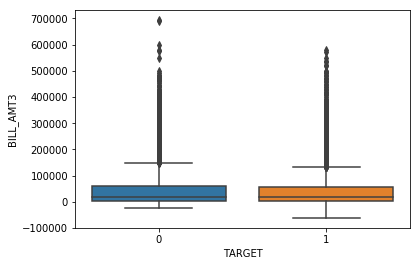

In [9]:
sns.boxplot(x='TARGET',y='LIMIT_BAL',data=training) #mirip strip plot tapi data nyembar
plt.show()

sns.boxplot(x='TARGET',y='BILL_AMT1',data=training) #mirip strip plot tapi data nyembar
plt.show()

sns.boxplot(x='TARGET',y='BILL_AMT2',data=training) #mirip strip plot tapi data nyembar
plt.show()

sns.boxplot(x='TARGET',y='BILL_AMT3',data=training) #mirip strip plot tapi data nyembar
plt.show()

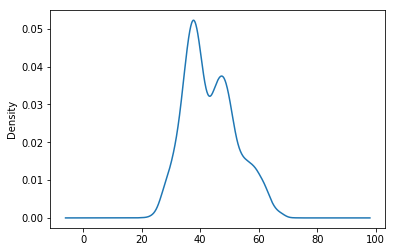

In [25]:
training['AGE'].plot.density()

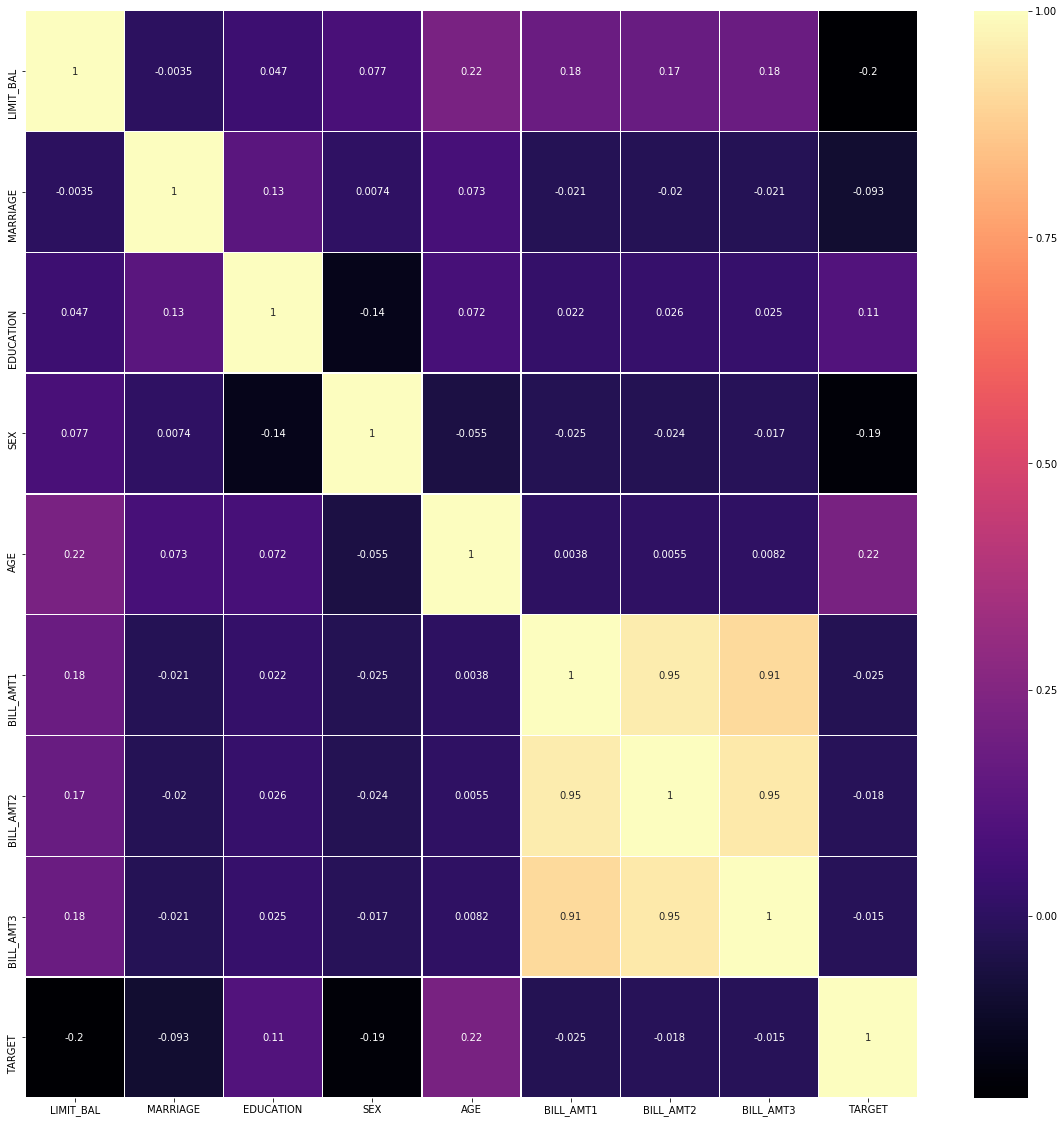

In [26]:
corr = training.corr()
df = pd.DataFrame(training.corr())
plt.figure(figsize=(20,20))
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

In [27]:
training["MARRIAGE"].replace(1, 'Belum Menikah', inplace=True)
training["MARRIAGE"].replace(2, 'Menikah', inplace=True)
training["MARRIAGE"].replace(3, 'Lainnya', inplace=True)
training["EDUCATION"].replace(1, 'S2/S3', inplace=True)
training["EDUCATION"].replace(2, 'Dipl/S1', inplace=True)
training["EDUCATION"].replace(3, 'SMA', inplace=True)
training["EDUCATION"].replace(4, 'Lainnya', inplace=True)
training["SEX"].replace(1, 'Pria', inplace=True)
training["SEX"].replace(2, 'Wanita', inplace=True)

In [28]:
training1=pd.get_dummies(training,columns=["MARRIAGE","EDUCATION","SEX"],drop_first=True)
training1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
ID,,,,,,,,,,,,
1,30000.0,40,24607.0,24430.0,23881.0,0,0,0,0,1,0,1
2,20000.0,41,17040.0,16474.0,17203.0,0,0,0,0,1,0,1
3,20000.0,36,17332.0,18600.0,17947.0,0,0,0,0,1,0,1
4,20000.0,35,2003.0,2948.0,3372.0,0,0,0,0,1,0,1
5,170000.0,38,171465.0,145196.0,110163.0,0,0,0,0,1,0,1


In [29]:
from sklearn.utils import shuffle
random=shuffle(training1)
train=random[:int((len(random)+1)*.80)] #untuk membentuk model perlu dilakukan split training dan testing data
validasi=random[int(len(random)*.80+1):] #digunakan 70%:30%

In [30]:
train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
ID,,,,,,,,,,,,
8195,110000.0,47,34486.0,43872.0,45140.0,0,0,1,0,0,0,1
14384,140000.0,50,39193.0,42816.0,42838.0,1,1,0,0,0,0,1
13292,50000.0,47,12762.0,12272.0,14255.0,1,0,1,0,0,0,0
15330,220000.0,47,49326.0,50302.0,50036.0,1,1,0,0,1,0,1
4632,280000.0,42,22398.0,30002.0,1715.0,0,0,0,0,0,1,0


In [31]:
validasi.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
ID,,,,,,,,,,,,
9871,300000.0,57,16260.0,11613.0,12893.0,0,0,0,0,0,0,1
15327,250000.0,50,61349.0,61600.0,61952.0,1,0,0,0,1,0,1
4273,30000.0,41,31956.0,30425.0,30615.0,0,0,1,0,0,0,0
14723,130000.0,49,17483.0,18552.0,19442.0,1,0,0,0,0,0,0
15405,330000.0,47,220901.0,207382.0,201883.0,1,0,1,0,0,1,0


In [32]:
X = training1.drop(['TARGET'], 1)
Y = training1['TARGET']
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)

In [58]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_X, train_y)
logregpred = logreg.predict(train_X)

In [59]:
print('Intercept : \n', logreg.intercept_)
coef=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coef

Intercept : 
 [3.17165427e-05]


,0,0
0,LIMIT_BAL,-4.667422e-06
1,AGE,9.330389e-03
2,BILL_AMT1,-2.487720e-06
3,BILL_AMT2,8.406823e-07
4,BILL_AMT3,1.434884e-06
5,MARRIAGE_Lainnya,3.686544e-09
6,MARRIAGE_Menikah,-1.579152e-04
7,EDUCATION_Lainnya,5.497987e-06
8,EDUCATION_S2/S3,-1.538020e-04
9,EDUCATION_SMA,1.581145e-04


odd rasio adalah perbandingan antara odd ratio pada x+1 dengan odd pada x.

In [60]:
cm=confusion_matrix(train_y,logregpred)
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n',cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Confusion Matrix : 
 [[5588 2349]
 [2626 2737]]
Accuracy :  0.6259398496240601
Sensitivity :  0.5103486854372553
Specificity :  0.7040443492503464


# LALALA

In [97]:
x_train = train.drop('TARGET', axis=1) #data training
y_train = train['TARGET']

x_test = validasi.drop('TARGET', axis=1) #data validasi
y_test = validasi['TARGET']



#model regresi logistik
import statsmodels.api as sm
logit_model=sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.597732
         Iterations 5
                          Results: Logit
Model:               Logit            No. Iterations:   5.0000    
Dependent Variable:  TARGET           Pseudo R-squared: 0.112     
Date:                2018-06-07 13:07 AIC:              15921.6751
No. Observations:    13300            BIC:              16004.1258
Df Model:            10               Log-Likelihood:   -7949.8   
Df Residuals:        13289            LL-Null:          -8956.7   
Converged:           1.0000           Scale:            1.0000    
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
LIMIT_BAL         -0.0000   0.0000 -27.7877 0.0000 -0.0000 -0.0000
AGE                0.0323   0.0011  29.1266 0.0000  0.0301  0.0345
BILL_AMT1         -0.0000   0.0000  -2.7889 0.0053 -0

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [100]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.623


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.69      0.70      2023
          1       0.53      0.54      0.54      1301

avg / total       0.63      0.63      0.63      3324



In [102]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1397,  626],
       [ 595,  706]], dtype=int64)

In [103]:
total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

In [105]:
print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)


Confusion Matrix : 
 [[1397  626]
 [ 595  706]]
Accuracy :  0.6326714801444043
Sensitivity :  0.5426594926979247
Specificity :  0.6905585763717251


In [82]:
testing.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
ID,,,,,,,,
1,30000.0,1,1,2,40,24430.0,23881.0,24234.0
2,20000.0,1,1,2,41,16474.0,17203.0,18411.0
3,20000.0,1,1,2,36,18600.0,17947.0,18758.0
4,20000.0,1,1,2,35,2948.0,3372.0,0.0
5,170000.0,1,1,2,38,145196.0,110163.0,112157.0


In [83]:
result.conf_int()

,0,1
LIMIT_BAL,-5.468213e-06,-4.747652e-06
AGE,3.011337e-02,3.445849e-02
BILL_AMT1,-4.564021e-06,-7.966871e-07
BILL_AMT2,-8.325937e-07,4.060641e-06
BILL_AMT3,-8.081745e-07,2.809912e-06
MARRIAGE_Lainnya,-5.883701e-01,8.209379e-02
MARRIAGE_Menikah,-8.624858e-01,-7.065531e-01
EDUCATION_Lainnya,-8.400738e-01,-2.523082e-01
EDUCATION_S2/S3,-8.353800e-01,-6.420121e-01
EDUCATION_SMA,2.141295e-02,1.916808e-01


# DECISION TREE

In [166]:
from sklearn import tree

model = tree.DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=10, random_state=123)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [167]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [168]:
y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8315282791817088

In [149]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Target 0','Target 1'],
    index=['Target 0', 'Target 1']
)

,Target 0,Target 1
Target 0,1373,650
Target 1,252,1049


In [150]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
model= model.fit(x_train,y_train)

In [117]:
features = train_X.columns
dt = DecisionTreeClassifier(min_samples_split=4000, min_samples_leaf=70, random_state=123)
dt.fit(train_X, train_y)
export_graphviz(dt, out_file='C:/Users/nikita059240/Documents/MATERI/supervised Machine Learning/dt.txt', feature_names = features, class_names = ["0","1"])

In [118]:
tree.export_graphviz(model,out_file='tree.dot') 

# Feature Engineering

In [356]:
training=pd.read_csv('D:/training.csv',index_col=0)
testing=pd.read_csv('D:/testing.csv',index_col=0)
training.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
ID,,,,,,,,,
1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [357]:
from sklearn.utils import shuffle
random=shuffle(training1)
train=random[:int((len(random)+1)*.80)] #untuk membentuk model perlu dilakukan split training dan testing data
validasi=random[int(len(random)*.80+1):]

In [358]:
X = training1.drop(['TARGET'], 1)
Y = training1['TARGET']

In [359]:
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,MARRIAGE_Lainnya,MARRIAGE_Menikah,EDUCATION_Lainnya,EDUCATION_S2/S3,EDUCATION_SMA,SEX_Wanita
ID,,,,,,,,,,,
1,30000.0,40,24607.0,24430.0,23881.0,0,0,0,1,0,1
2,20000.0,41,17040.0,16474.0,17203.0,0,0,0,1,0,1
3,20000.0,36,17332.0,18600.0,17947.0,0,0,0,1,0,1
4,20000.0,35,2003.0,2948.0,3372.0,0,0,0,1,0,1
5,170000.0,38,171465.0,145196.0,110163.0,0,0,0,1,0,1


In [360]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [361]:
from sklearn import tree

model = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=20, random_state=123)

In [362]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [363]:
y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8396992481203007

In [364]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[1796,  256],
       [ 277,  996]], dtype=int64)

In [365]:
total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

In [366]:
print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)


Confusion Matrix : 
 [[1796  256]
 [ 277  996]]
Accuracy :  0.8396992481203007
Sensitivity :  0.7824037706205813
Specificity :  0.8752436647173489


# IMPLEMENTATION TO DATA TESTING  (CREDIT TESTING)

In [367]:
training=pd.read_csv('D:/training.csv',index_col=0)
testing=pd.read_csv('D:/testing.csv',index_col=0)
training.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
ID,,,,,,,,,
1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [368]:
kredittesting=pd.get_dummies(testing,columns=['MARRIAGE','EDUCATION','SEX'],drop_first=True)
kredittesting.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_2
ID,,,,,,,,,,,
1,30000.0,40,24430.0,23881.0,24234.0,0,0,0,0,0,1
2,20000.0,41,16474.0,17203.0,18411.0,0,0,0,0,0,1
3,20000.0,36,18600.0,17947.0,18758.0,0,0,0,0,0,1
4,20000.0,35,2948.0,3372.0,0.0,0,0,0,0,0,1
5,170000.0,38,145196.0,110163.0,112157.0,0,0,0,0,0,1


### Probability prediction

In [373]:
dtpred=model.predict_proba(kredittesting)
dtpred=pd.DataFrame(dtpred)
dtpred.columns=['Prob0','Prob1']
dtpred.head()

,Prob0,Prob1
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.913043,0.086957


### Clas prediction

In [377]:
dtpred1=model.predict(kredittesting)
dtpred1=pd.DataFrame(dtpred1)
dtpred1.columns=['Class']
dtpred1.head()

,Class
0,0
1,0
2,0
3,0
4,0


## Data Outlook

In [378]:
myprediction=pd.concat([kredittesting,dtpred,dtpred1],axis=1)
myprediction.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_2,Prob0,Prob1,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.0
1,30000.0,40.0,24430.0,23881.0,24234.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0
2,20000.0,41.0,16474.0,17203.0,18411.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0
3,20000.0,36.0,18600.0,17947.0,18758.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0
4,20000.0,35.0,2948.0,3372.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.913043,0.086957,0.0


In [379]:
myprediction.to_csv('myprediction.csv', index=False, header=True)